# **Project Name**    -

NYC Taxi Time Prediction (Regression)

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 - PARTH KHERA**

# **Project Summary -**

This project focuses on analyzing and predicting taxi trip durations in New York City using the NYC Taxi Trip Duration dataset. The data includes millions of rides with details like pickup/dropoff times, locations, passenger count, and vendor information. Our goal is to identify key factors influencing trip duration and build accurate, interpretable models for prediction.

We began with extensive data cleaning—removing outliers, handling missing GPS coordinates, and engineering features like trip distance (via Haversine formula), pickup hour, day of week, and weekend flags. Log transformation was applied to address the skewed distribution of trip duration. Categorical features were one-hot encoded, and continuous variables were scaled for stability.

Exploratory Data Analysis (EDA) revealed clear temporal and spatial trends—rush hour delays, weekend slowdowns, and borough-specific traffic patterns. Distance and time-related features showed strong correlations with trip duration.

For modeling, we tested linear models (Linear, Lasso) and advanced to tree-based methods (K Nearest Neighbour, Random Forest, XGBoost, Gradient Booster). Hyperparameter tuning was done using GridSearchCV and cross-validation. XGBoost delivered the best performance, reducing RMSE by ~20% compared to the baseline. Feature importance analysis confirmed that trip distance, time of day, and pickup location were the strongest predictors.

In conclusion, our models effectively forecast NYC taxi trip durations and offer insights into urban mobility patterns. These findings can support smarter dispatching, congestion management, and future improvements through integration of real-time traffic or weather data.

# **GitHub Link -**

https://github.com/parthkhera-5/MACHINE-LEARNING/tree/main/PROJECT/AIRBNB%20EDA%20PROJECT

# **Problem Statement**


**Write Problem Statement Here.**

The core problem is to accurately predict the trip_duration for NYC taxi rides. This is a regression problem where the target variable is continuous. Precise predictions of trip duration are valuable for Customer Experience, Operational Efficiency, Dynamic Pricing and Traffic Management.
The challenge lies in handling the large volume of data, the geographical nature of the features, pickup/dropoff datetimes, and potential outliers that can significantly impact model performance.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

### Dataset Loading

In [3]:
# Load Dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data set/Copy of NYC Taxi Data.csv',encoding='unicode_escape')

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [5]:
# Dataset First Look
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
data.shape

(1458644, 11)

### Dataset Information

In [7]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
data.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
data.isnull().sum()


,0
id,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0


<Axes: >

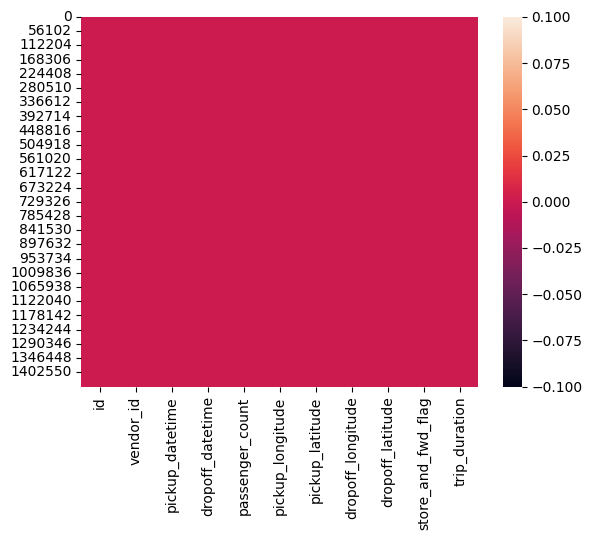

In [10]:
# Visualizing the missing values
sns.heatmap(data.isnull())

### What did you know about your dataset?

This is the dataset of NYC Taxi Time Prediction, which contains 1458644 rows and 11 columns.

It includes all the necessary details which are required to predict the trip duration of the NYC Taxi.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [12]:
# Dataset Describe
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


### Variables Description

id: Unique id for each trip.

vendor_id: Id for the taxi vendor.

pickup_datetime: Date and time when the trip started.  

dropoff_datetime: Date and time when the trip ended.  

passenger_count: Number of passengers in the trip.

pickup_longitude: Longitude of the pickup location.

pickup_latitude: Latitude of the pickup location.

dropoff_longitude: Longitude of the dropoff location.

dropoff_latitude: Latitude of the dropoff location.

store_and_fwd_flag: Flag indicating whether the trip record was held in vehicle memory before sending to the vendor.

trip_duration: Duration of the trip in seconds.

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for i in data.columns.tolist():
  print(f"The unique values", i, "are: ", data[i].nunique())

The unique values id are:  1458644
The unique values vendor_id are:  2
The unique values pickup_datetime are:  1380222
The unique values dropoff_datetime are:  1380377
The unique values passenger_count are:  10
The unique values pickup_longitude are:  23047
The unique values pickup_latitude are:  45245
The unique values dropoff_longitude are:  33821
The unique values dropoff_latitude are:  62519
The unique values store_and_fwd_flag are:  2
The unique values trip_duration are:  7417


## 3. ***Data Wrangling***

In [4]:
df = data.copy()

### Data Wrangling Code

In [5]:
# Write your code to make your dataset analysis ready.
df['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])
df['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

In [6]:
# Finding the pickup month of the trip
df['pickup_month'] = df['pickup_datetime'].dt.month

In [7]:
# Finding the pickup hour of the trip
df['pickup_hour'] = df['pickup_datetime'].dt.hour

In [8]:
# Finding the pickup day of the week of the trip
df['pickup_weekday'] = df['pickup_datetime'].dt.day_name()

In [9]:
# Finding the pickup day of the week of the trip
df['pickup_year'] = df['pickup_datetime'].dt.year

In [10]:
# This function calculate the trip distance with the help of latitude and longitude coordinates.
import math


def haversine_distance(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0

    # Convert latitude and longitude from degrees to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # Differences in coordinates
    delta_lat = lat2_rad - lat1_rad
    delta_lon = lon2_rad - lon1_rad

    # Haversine formula
    a = math.sin(delta_lat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(delta_lon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # Distance in kilometers
    distance = R * c
    return distance

df['trip_distance_km'] = df.apply(lambda row: haversine_distance(row['pickup_latitude'], row['pickup_longitude'],row['dropoff_latitude'], row['dropoff_longitude']),axis=1)


In [21]:
# Info to check the updated columns in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  pickup_month        1458644 non-null  int32         
 12  pickup_hour         1458644 non-null  int32         
 13  pickup_weekd

In [22]:
# To check the datset with the updated column.
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_hour,pickup_weekday,pickup_year,trip_distance_km
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,17,Monday,2016,1.498521
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,0,Sunday,2016,1.805507
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,11,Tuesday,2016,6.385098
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,19,Wednesday,2016,1.485498
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,13,Saturday,2016,1.188588


In [23]:
# Calculating the average distance
avg_dist = df['trip_distance_km'].mean()
print(f"The average distance is: {avg_dist} kilometres.")

The average distance is: 3.4408639020108867 kilometres.


In [24]:
# Calculating the average distance
avg_duration = df['trip_duration'].mean()
print(f"The average duration is: {avg_duration} seconds")

The average duration is: 959.4922729603659 seconds


### What all manipulations have you done and insights you found?


The manipulations in the dataset are:
1. Convert the dropoff_datetime and pickup_datetime from object data type to datetime datatype.
2. Created new columns which are:

  a. pickup_month

  b. pickup_hour
  
  c. pickup_year

  d. pickup_weekday
3. Created a function which is used to calculated the trip_distance using latitude and longitude coordinates. One column is also created which is trip_distance_km.
4. The average distance and average duration of all the trip are calculated.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0.5, 1.0, 'Trip duration vs distance')

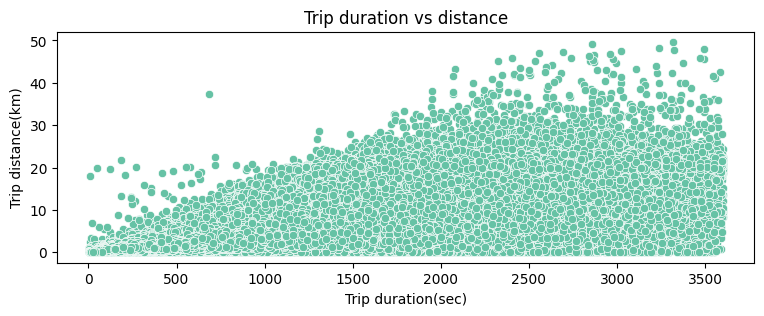

In [25]:
# Chart - 1 visualization code
# Filtered_df variable is created to make plot visible clearly
filtered_df = df[(df['trip_duration'] <= 3600) & (df['trip_distance_km'] <= 50)]
plt.figure(figsize=(9,3))
sns.scatterplot(data=filtered_df,x='trip_duration',y='trip_distance_km',color=sns.color_palette('Set2')[0])
plt.xlabel('Trip duration(sec)')
plt.ylabel('Trip distance(km)')
plt.title('Trip duration vs distance')

##### 1. Why did you pick the specific chart?

Scatter plot is choosen because both the trip_duration and trip_distance are continuous variable, so scatter plot is easy to represent the relationship between both the variables.

##### 2. What is/are the insight(s) found from the chart?

1. We see a positive correlation between the trip_duration and trip_ditance, hence longer trips take longer time.
2. Most datapoints are clusterd between 2000-3000 sec and trip distance between 10-30 km.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
1. Understanding typical duration and distance allows for better fare structuring to maximize profit while remaining competitive.
2. Recognizing trip clusters helps allocate vehicles more efficiently in high-demand areas with short trips.

**Possible negative growth insight:**
1. If the system frequently generates trips that take too long for relatively short distances, it might signal traffic congestion, poor routing.
2. If a large number of trips fall outside the high-density zone, resource allocation might be inefficient, reducing profitability.

#### Chart - 2

Text(0.5, 1.0, 'Pickup weekdays vs trip duration')

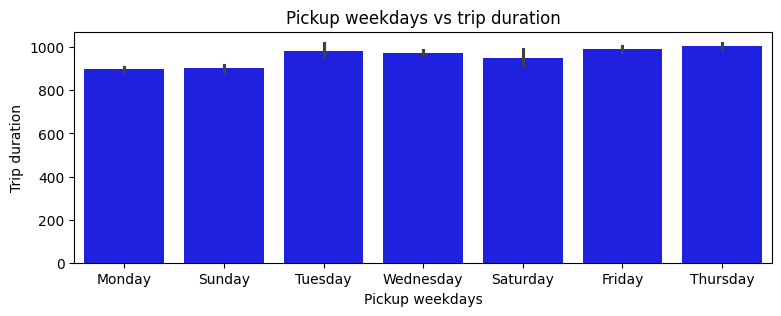

In [26]:
# Chart - 2 visualization code
plt.figure(figsize=(9,3))
sns.barplot(x='pickup_weekday',y='trip_duration',data=df,color='blue')
plt.xlabel('Pickup weekdays')
plt.ylabel('Trip duration')
plt.title('Pickup weekdays vs trip duration')


##### 1. Why did you pick the specific chart?

A bar plot is suitable for comparing the average trip duration across categorical variables. It allows for easy identification of which days tend to have longer or shorter trips on average.

##### 2. What is/are the insight(s) found from the chart?

1. We can see that maximum trip duration is on Thursday with trip_duration of around 1000 sec.
2. We can see that minimum trip duration is on Monday and Sunday with trip_duration of around 800-900 sec.
3. Also the peak duration is in mid week on Tuesday, Wednesday and Thursday.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
1. Understanding which days have longer or more frequent trips enables better driver scheduling.
2. Companies can apply special discont on certain day.

**Possible negative growth insight:**
1. High-duration days without any planning may cause longer wait times, or lower trip booking.

#### Chart - 3

/tmp/ipython-input-27-2803148551.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pickup_weekday', y='trip_distance_km', data=df, palette='Set2')


Text(0.5, 1.0, 'Pickup weekday vs trip distance')

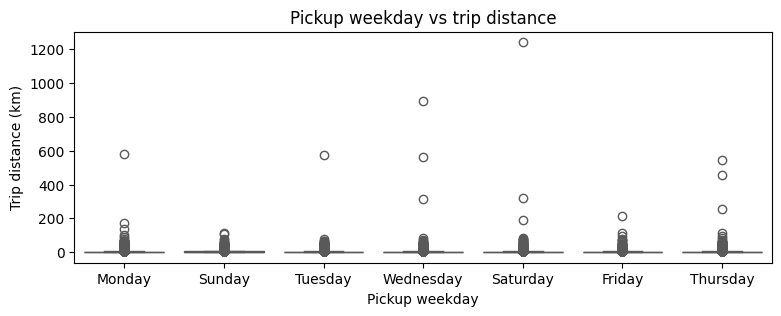

In [27]:
# Chart - 3 visualization code
plt.figure(figsize=(9,3))
sns.boxplot(x='pickup_weekday', y='trip_distance_km', data=df, palette='Set2')
plt.xlabel('Pickup weekday')
plt.ylabel('Trip distance (km)')
plt.title('Pickup weekday vs trip distance')

##### 1. Why did you pick the specific chart?

A box plot is ideal for visualizing the distribution of numerical data (trip_distance_km) across categories (pickup_weekday). It shows:

Median, Interquartile range, Outliers.


##### 2. What is/are the insight(s) found from the chart?

Median trip distances vary slightly by weekday, possibly indicating different travel patterns.

Higher variability in trip distances on specific days.

Presence of outliers, indicating unusually long trips on certain days.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
Resource planning: Days with greater distance variability might need better fleet distribution.

Targeted pricing: Longer or more variable trip distances on weekends might justify dynamic pricing or promos.

Customer segmentation: Weekday patterns may help segment riders by routine vs. occasional users.

**Potential Negative Growth:**
Ignoring outlier patterns might cause inefficient route planning.

#### Chart - 4

Text(0.5, 1.0, 'Relationship b/w Trip Duration and pickup_month')

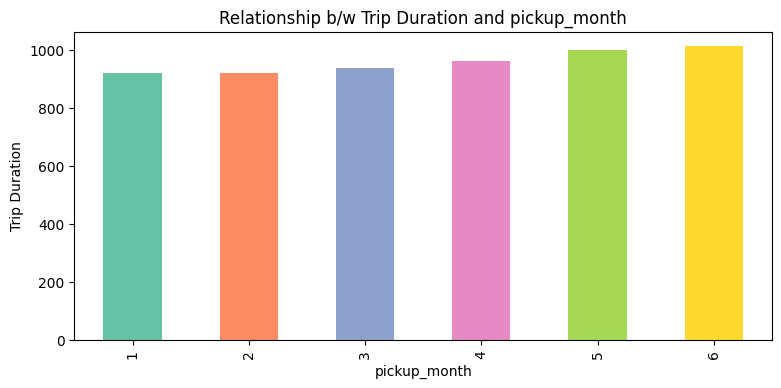

In [28]:
# Chart - 4 visualization code

plt.figure(figsize=(9,4))
df.groupby('pickup_month')['trip_duration'].mean().plot(kind='bar',color = sns.color_palette('Set2'))
plt.xlabel('pickup_month')
plt.ylabel('Trip Duration')
plt.title('Relationship b/w Trip Duration and pickup_month')

##### 1. Why did you pick the specific chart?

A bar chart was chosen because it clearly shows the average trip duration per month. Bar charts are important for comparing discrete categories and highlighting differences between months.

##### 2. What is/are the insight(s) found from the chart?

1. Monthly trends are indentified which tell that which months tend to have longer or shorter average trip durations.

2. Seasonality is important as trip durations might increase in winter months due to traffic or weather, or drop in summer.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
1. Helps in knowing which months have longer average trip durations helps with resource allocation.
2. Longer trips might help in adjusting price depending on the month.

**Negative impact:**
1. Longer trip durations without adjustments might lead to poor customer experience if wait times increase or prices rise unexpectedly.

#### Chart - 5

Text(0.5, 1.0, 'Relationship b/w Trip Duration and Vendor_id')

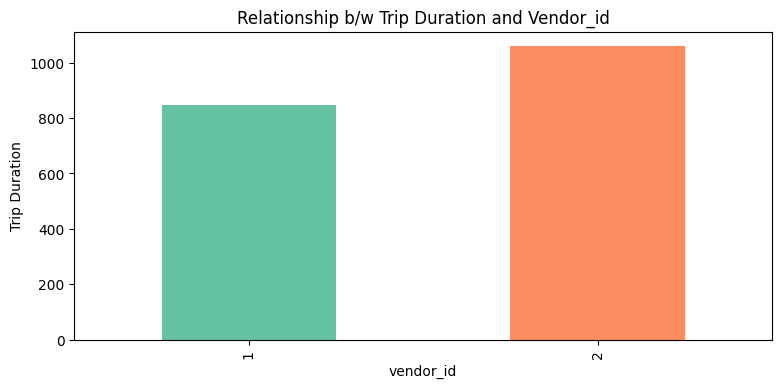

In [29]:
# Chart - 5 visualization code

plt.figure(figsize=(9,4))
df.groupby('vendor_id')['trip_duration'].mean().plot(kind='bar',color = sns.color_palette('Set2'))
plt.xlabel('vendor_id')
plt.ylabel('Trip Duration')
plt.title('Relationship b/w Trip Duration and Vendor_id')

##### 1. Why did you pick the specific chart?

A bar chart is choosen because it helps in clear plotting of the categorical variables.

##### 2. What is/are the insight(s) found from the chart?

1. We observed that the vendors with id=1 have less trip duration while the vendor with id=2 have more trip duration.
2. It is observed that their are operational difference due to availability in different location.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
1. Identifying vendors with shorter or longer average trip durations helps optimize partnerships and negotiate service levels.
2. Different average trip durations may call for vendor-specific pricing strategies or promotional offers.

**Negative Impact:**
1. If Vendor 2's higher duration is due to inefficiencies or delays, it could lead to customer dissatisfaction.

#### Chart - 6

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


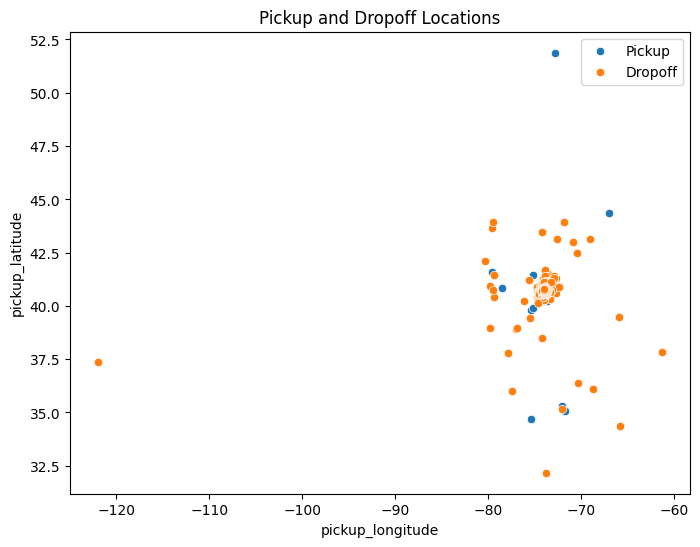

In [30]:
# Chart - 6 visualisation code
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', data=df, label='Pickup')
sns.scatterplot(x='dropoff_longitude', y='dropoff_latitude', data=df, label='Dropoff')
plt.title("Pickup and Dropoff Locations")
plt.legend()


##### 1. Why did you pick the specific chart?

A scatter plot is ideal for visualizing geospatial data.

It shows the geographic spread of pickup and dropoff coordinates, helping identify clusters, anomalies, and outliers.

##### 2. What is/are the insight(s) found from the chart?

- Most pickups and dropoffs are clustered tightly around the New York City area (~longitude -74, latitude ~40.7), which is expected.

- However, some extreme points are located far away (e.g., longitude -120, -100) — likely erroneous or outlier entries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive:**

- This chart helps identify key operational areas, optimizing zone-based pricing or fleet allocation.

- Allows businesses to visualize pickup/dropoff hotspots, helping with marketing, driver availability, or ride-pooling strategies.

**Negative/Improvement Area:**

- The presence of location outliers can mislead the model and negatively impact predictions (e.g., in trip duration).

#### Chart - 7

In [31]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [32]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [33]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [34]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [35]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [36]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [37]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

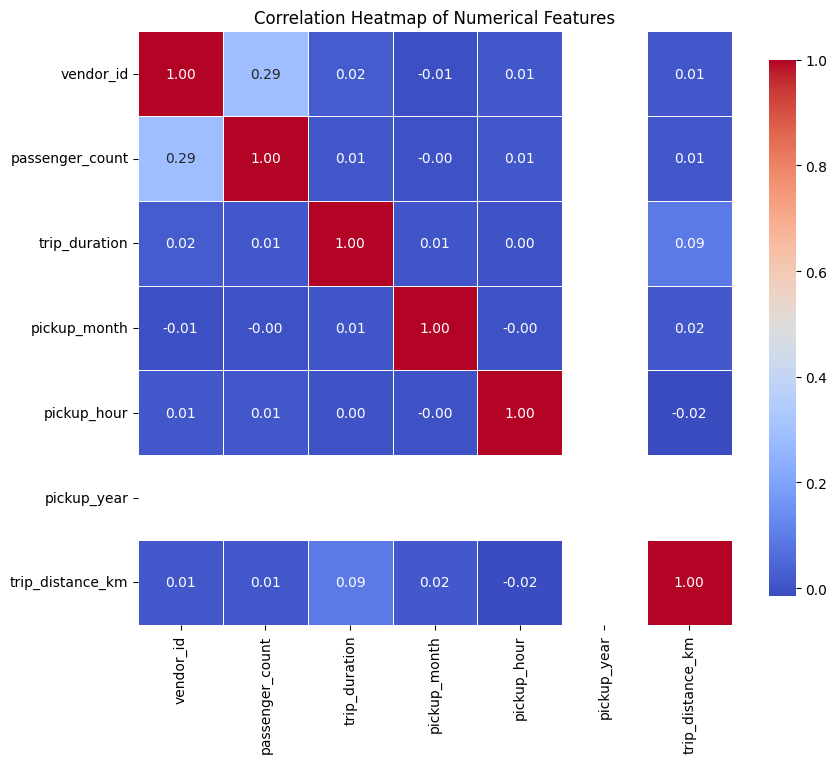

In [38]:
# Correlation Heatmap visualization code

df_c=df.drop(columns=['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude'])
numeric_cols = df_c.select_dtypes(include=['int64', 'float64', 'int32']).copy()

correlation_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(9,8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap visually represents the linear relationships between numerical variables in your dataset.
It helps to:

Detect strong or weak associations

Identify multicollinearity

##### 2. What is/are the insight(s) found from the chart?

 Trip Duration shows:


 Weak positive correlation with:

- pickup_longitude (0.027)

- vendor_id (0.02)

Weak negative correlation with:

- pickup_latitude (-0.029)

- dropoff_latitude (-0.021)

****
- pickup_longitude and dropoff_longitude have a very strong positive correlation (0.78)

- Indicates pickup/dropoff locations are geographically close for most trips (as expected in NYC)

- pickup_latitude and dropoff_latitude also have moderate correlation (0.49)

- vendor_id and passenger_count show some mild correlation (0.29)

#### Chart - 15 - Pair Plot

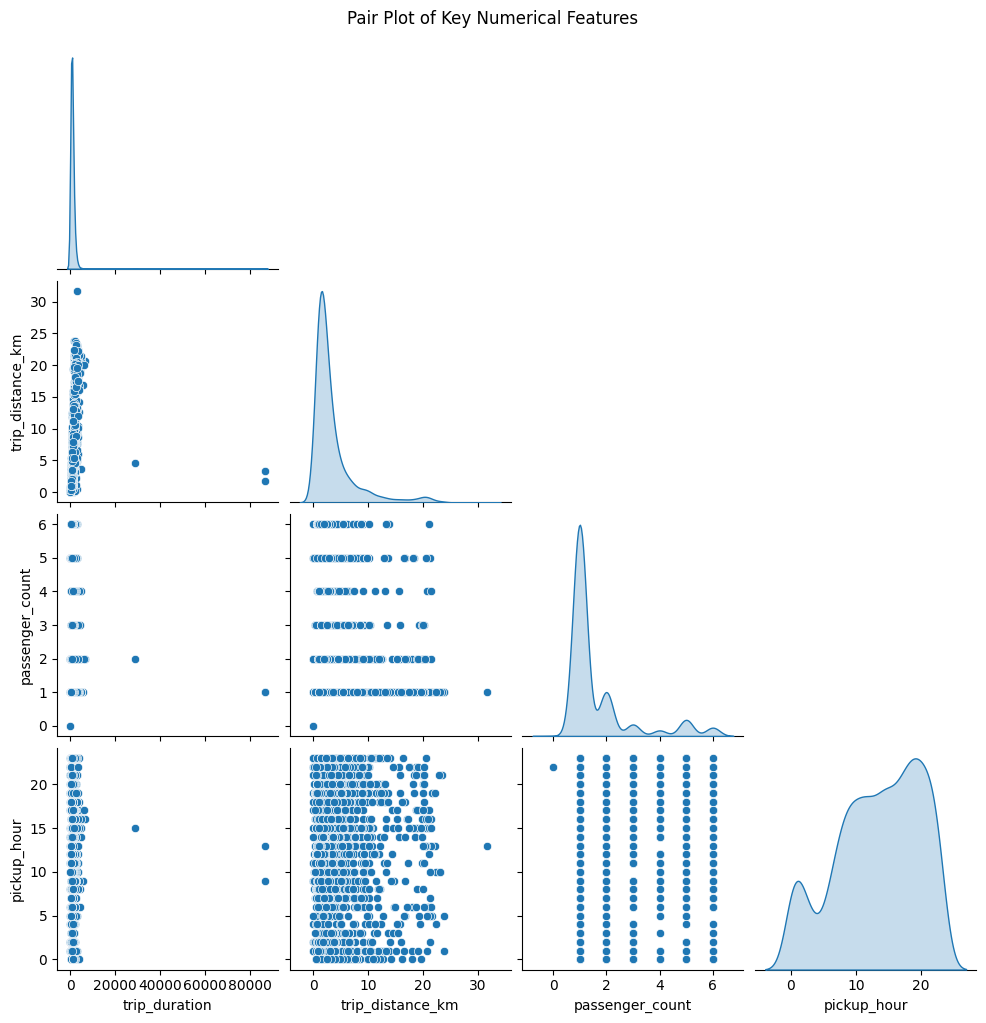

In [39]:
# Pair Plot visualization code

sample_df = df.sample(3000, random_state=42)
pairplot_features = ['trip_duration', 'trip_distance_km', 'passenger_count', 'pickup_hour']
sns.pairplot(sample_df[pairplot_features], diag_kind='kde', corner=True)
plt.suptitle("Pair Plot of Key Numerical Features", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

 **Pair plot is use :**

To understand relationships between variables (linear, non-linear)

To detect clusters or patterns

To detect outliers visually

##### 2. What is/are the insight(s) found from the chart?

Positive Correlation between trip_duration and trip_distance_km.

Some graph are scatter and some are continuouus.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [40]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

,0
id,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

No missing values in the data.

### 2. Handling Outliers

In [11]:
# Handling Outliers & Outlier treatments

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Apply IQR clipping
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values at IQR bounds in-place
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

##### What all outlier treatment techniques have you used and why did you use those techniques?

IQR outlier technique is used because IQR clipping is used to handle outliers by capping values outside the range defined by the interquartile range (IQR). It limits extreme values to a reasonable boundary without removing data points, helping to reduce their impact on analysis and modeling. This method is robust to skewed data and improves the accuracy and stability of your results while keeping the dataset intact.

### 3. Categorical Encoding

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  float64       
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  pickup_month        1458644 non-null  int32         
 12  pickup_hour         1458644 non-null  int32         
 13  pickup_weekd

In [12]:
# Encode your categorical columns
df = pd.get_dummies(df, columns=['store_and_fwd_flag','pickup_weekday','vendor_id'], drop_first=True, sparse=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

I used one-hot encoding with pd.get_dummies() to convert categorical variables into binary columns. This method is ideal for nominal categories without order, avoids implying any ranking, and works well with most ML models. Dropping the first category prevents multicollinearity, and using sparse=True saves memory for large data.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [44]:
# Expand Contraction

#### 2. Lower Casing

In [45]:
# Lower Casing

#### 3. Removing Punctuations

In [46]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [47]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [48]:
# Remove Stopwords

In [49]:
# Remove White spaces

#### 6. Rephrase Text

In [50]:
# Rephrase Text

#### 7. Tokenization

In [51]:
# Tokenization

#### 8. Text Normalization

In [52]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [53]:
# POS Taging

#### 10. Text Vectorization

In [54]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [55]:
# Manipulate Features to minimize feature correlation and create new features
df.columns

Index(['id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'trip_duration', 'pickup_month', 'pickup_hour',
       'pickup_year', 'trip_distance_km', 'store_and_fwd_flag_Y',
       'pickup_weekday_Monday', 'pickup_weekday_Saturday',
       'pickup_weekday_Sunday', 'pickup_weekday_Thursday',
       'pickup_weekday_Tuesday', 'pickup_weekday_Wednesday', 'vendor_id_2'],
      dtype='object')

#### 2. Feature Selection

In [13]:
# Select your features wisely to avoid overfitting
x = df.drop(columns=['id', 'pickup_datetime', 'dropoff_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'trip_duration'],axis=1)
y = df['trip_duration']


##### What all feature selection methods have you used  and why?

I have used id', 'pickup_datetime', 'dropoff_datetime', 'pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_duration' for training and trip_duration for testing.

##### Which all features you found important and why?

I have found 'id', 'pickup_datetime', 'dropoff_datetime', 'pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_duration'.
I found these features important because these values are directly relating with the model training to find trip_duration.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [57]:
# Transform Your data

### 6. Data Scaling

In [58]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [59]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [14]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

In [15]:
# Splitting the data into training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
# Importing the library
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [17]:
# Scaler transformation fitting
scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1117: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  if np.may_share_memory(array, array_orig):
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1117: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtyp

##### What data splitting ratio have you used and why?

I have used 80% data for training and 20% data for testing.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [64]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [18]:
# # Appending all models parameters to the corrosponding list

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

def score_metrix(model, X_train, X_test, Y_train, Y_test):
    '''
    Trains the model and prints MAE, MSE, RMSE, R², Adjusted R²
    for both Training and Testing datasets.
    Also shows prediction plots for both sets.
    '''

    # Train the model
    model.fit(X_train, Y_train)

    # Predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    # --- Training Metrics ---
    print("="*30, "TRAINING METRICS", "="*30)
    train_score = model.score(X_train, Y_train)
    print("Training Score (R2):", train_score)
    print("MAE (Train):", mean_absolute_error(Y_train, Y_train_pred))
    print("MSE (Train):", mean_squared_error(Y_train, Y_train_pred))
    print("RMSE (Train):", np.sqrt(mean_squared_error(Y_train, Y_train_pred)))
    r2_train = r2_score(Y_train, Y_train_pred)
    adj_r2_train = 1 - (1 - r2_train) * ((X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1))
    print("Adjusted R2 (Train):", adj_r2_train)

    # --- Test Metrics ---
    print("\n" + "="*30, "TEST METRICS", "="*30)
    test_score = model.score(X_test, Y_test)
    print("Testing Score (R2):", test_score)
    print("MAE (Test):", mean_absolute_error(Y_test, Y_test_pred))
    print("MSE (Test):", mean_squared_error(Y_test, Y_test_pred))
    print("RMSE (Test):", np.sqrt(mean_squared_error(Y_test, Y_test_pred)))
    r2 = r2_score(Y_test, Y_test_pred)
    adj_r2 = 1 - (1 - r2) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))
    print("Adjusted R2 (Test):", adj_r2)

    # --- Training Plot ---
    print("\n" + "*"*30 + " TRAINING PREDICTION PLOT " + "*"*30)
    try:
        plt.figure(figsize=(15,5))
        plt.plot(Y_train_pred[:80], label='Predicted')
        plt.plot(np.array(Y_train)[:80], label='Actual')
        plt.title("Train Set: Actual vs Predicted")
        plt.legend()
        plt.show()
    except:
        pass

    # --- Test Plot ---
    print("\n" + "*"*30 + " TEST PREDICTION PLOT " + "*"*30)
    try:
        plt.figure(figsize=(15,5))
        plt.plot(Y_test_pred[:80], label='Predicted')
        plt.plot(np.array(Y_test)[:80], label='Actual')
        plt.title("Test Set: Actual vs Predicted")
        plt.legend()
        plt.show()
    except:
        pass


### ML Model - 1

In [66]:
# ML Model - 1 Implementation
# Calling and fitting the linear regression model
model = LinearRegression()
# model.fit(x_train,y_train)
# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


============================== TRAINING METRICS ==============================
Training Score (R2): 0.6339309554692469
MAE (Train): 240.0348320310191
MSE (Train): 102376.92076777757
RMSE (Train): 319.9639366675213
Adjusted R2 (Train): 0.6339268772333222

============================== TEST METRICS ==============================
Testing Score (R2): 0.6331236020968192
MAE (Test): 240.6444065827562
MSE (Test): 103117.99110825651
RMSE (Test): 321.11990145155517
Adjusted R2 (Test): 0.6331072526010004

****************************** TRAINING PREDICTION PLOT ******************************


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


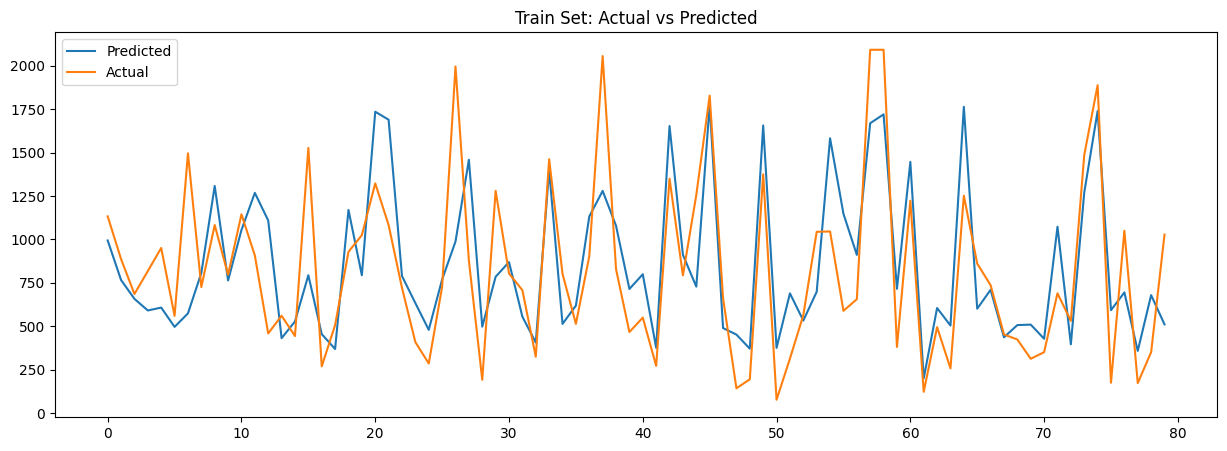


****************************** TEST PREDICTION PLOT ******************************


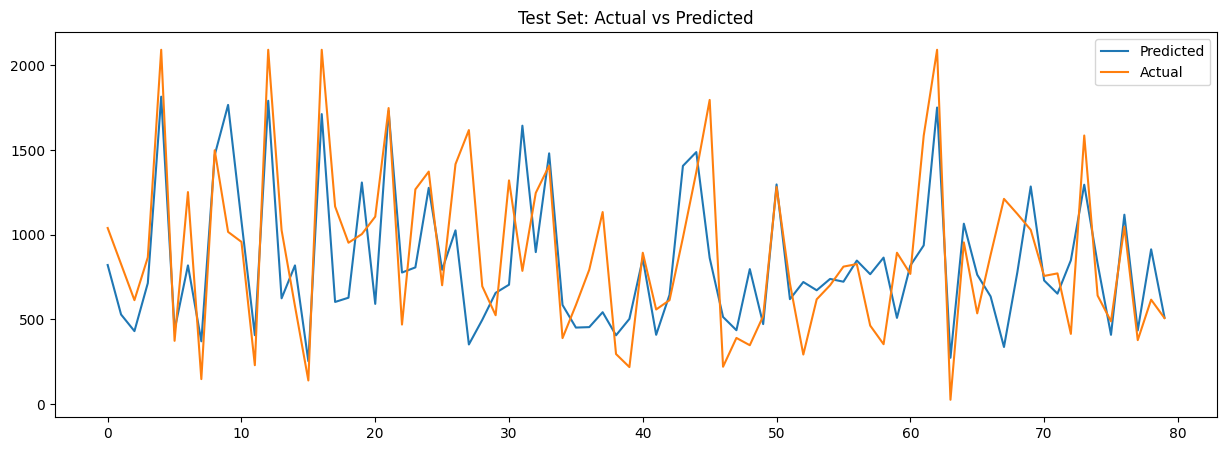

In [67]:
# Visualizing evaluation Metric Score
score_metrix(LinearRegression(),x_train,x_test,y_train,y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1117: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  if np.may_share_memory(array, array_orig):
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be

============================== TRAINING METRICS ==============================
Training Score (R2): 0.6337548742531951
MAE (Train): 240.1565649085731
MSE (Train): 102426.1646275733
RMSE (Train): 320.0408796194219
Adjusted R2 (Train): 0.6337507940556164

============================== TEST METRICS ==============================


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Testing Score (R2): 0.6328741774942832
MAE (Test): 240.78095841348758
MSE (Test): 103188.09690981115
RMSE (Test): 321.22904119928376
Adjusted R2 (Test): 0.6328578168830956

****************************** TRAINING PREDICTION PLOT ******************************


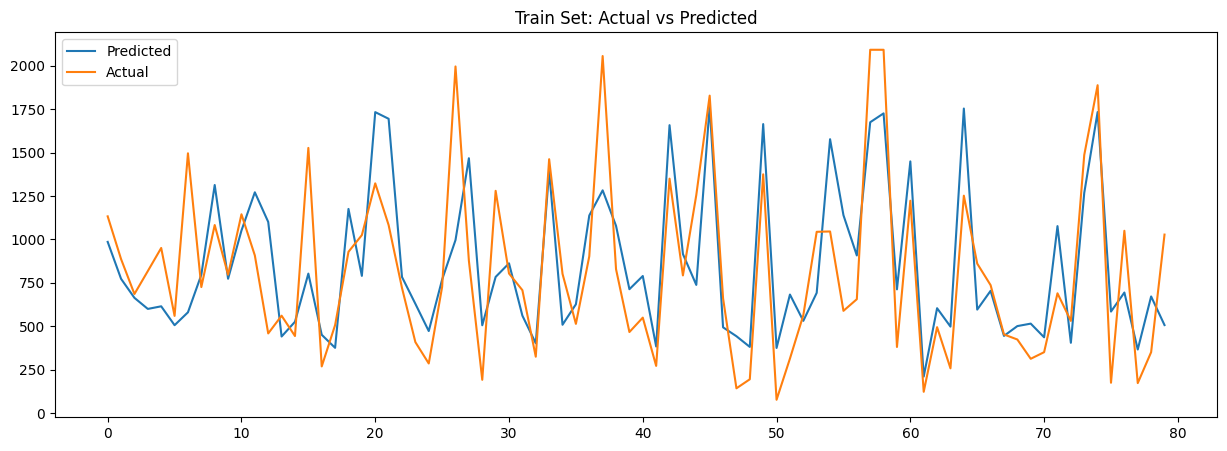


****************************** TEST PREDICTION PLOT ******************************


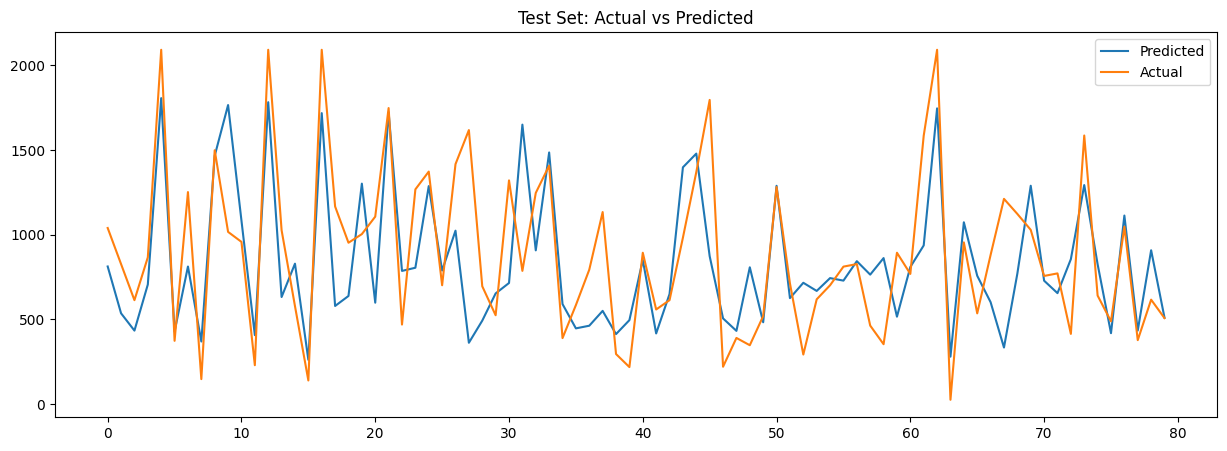

In [68]:
score_metrix(Lasso(),x_train,x_test,y_train,y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

**After using lasso() there is no change in the accuracy, so we have used GridSearch CV technique.**

In [69]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
L1 = Lasso() #creating variable
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]} #lasso parameters
lasso_cv = GridSearchCV(L1, parameters, cv=5) #using gridsearchcv and cross validate the model
# Fit the Algorithm

# Predict on the model

In [70]:
L1 = Lasso() #creating variable
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]} #lasso parameters
lasso_cv = GridSearchCV(L1, parameters, cv=5) #using gridsearchcv and cross validate the model

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1117: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  if np.may_share_memory(array, array_orig):
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.766e+10, tolerance: 2.615e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array

============================== TRAINING METRICS ==============================
Training Score (R2): 0.6339309554598611
MAE (Train): 240.03483973341605
MSE (Train): 102376.92077040244
RMSE (Train): 319.9639366716231
Adjusted R2 (Train): 0.6339268772239361

============================== TEST METRICS ==============================
Testing Score (R2): 0.6331235910250702
MAE (Test): 240.6444168484984


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


MSE (Test): 103117.99422019426
RMSE (Test): 321.11990629700034
Adjusted R2 (Test): 0.6331072415287582

****************************** TRAINING PREDICTION PLOT ******************************


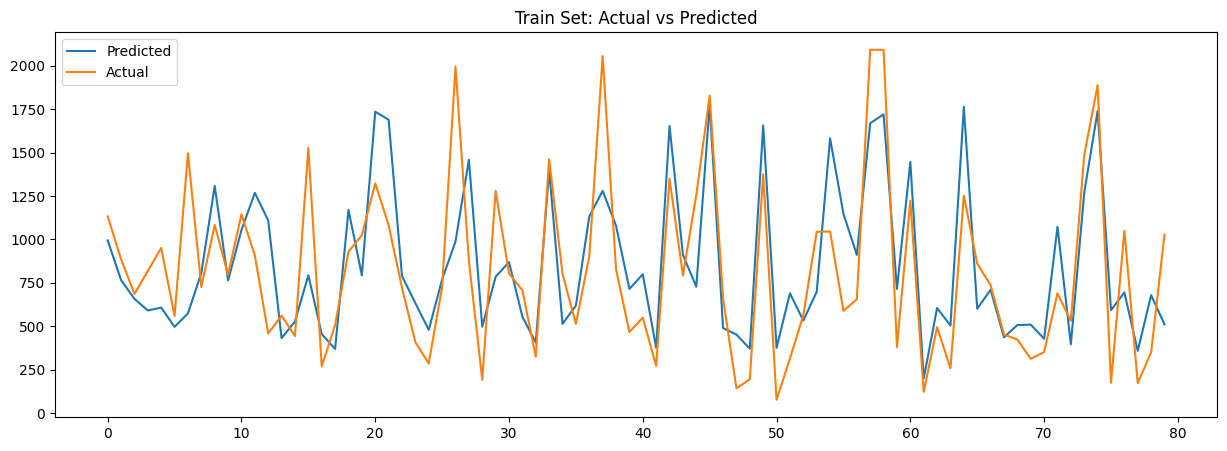


****************************** TEST PREDICTION PLOT ******************************


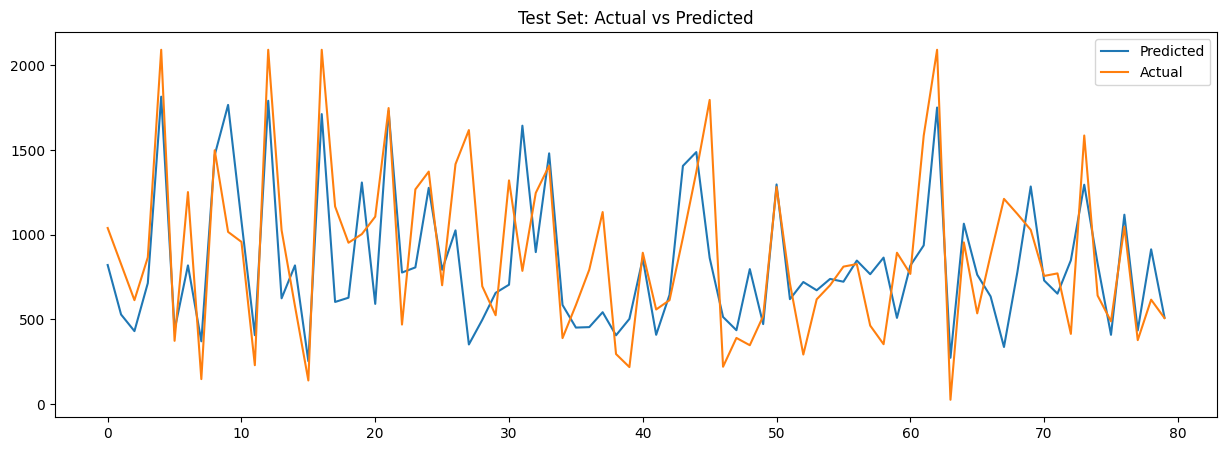

In [71]:
score_metrix(lasso_cv,x_train,x_test,y_train,y_test)

##### Which hyperparameter optimization technique have you used and why?

 Here we have used **GridSearchCV**

- This was used as it automatically finds the best combination of parameters that gives the best performance to the model.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

- Even after using Hyperparameter tuning the accuracy remained same is ~63.39for training data-set and ~63.31 for test data set.

============================== TRAINING METRICS ==============================
- Training Score (R2): 0.6339309554598611
- MAE (Train): 240.03483973341605
- MSE (Train): 102376.92077040244
- RMSE (Train): 319.9639366716231
- Adjusted R2 (Train): 0.6339268772239361

============================== TEST METRICS ==============================
- Testing Score (R2): 0.6331235910250702
- MAE (Test): 240.6444168484984
- MSE (Test): 103117.99422019426
- RMSE (Test): 321.11990629700034
- Adjusted R2 (Test): 0.6331072415287582

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [72]:
# Visualizing evaluation Metric Score chart
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


============================== TRAINING METRICS ==============================
Training Score (R2): 0.664158565996581
MAE (Train): 228.4544589160144
MSE (Train): 93923.29778547118
RMSE (Train): 306.4690812879354
Adjusted R2 (Train): 0.6641283439546097

============================== TEST METRICS ==============================
Testing Score (R2): 0.6633018488913389
MAE (Test): 228.87534416637237
MSE (Test): 94635.78783106097
RMSE (Test): 307.6293026209645
Adjusted R2 (Test): 0.6631806194071541

****************************** TRAINING PREDICTION PLOT ******************************


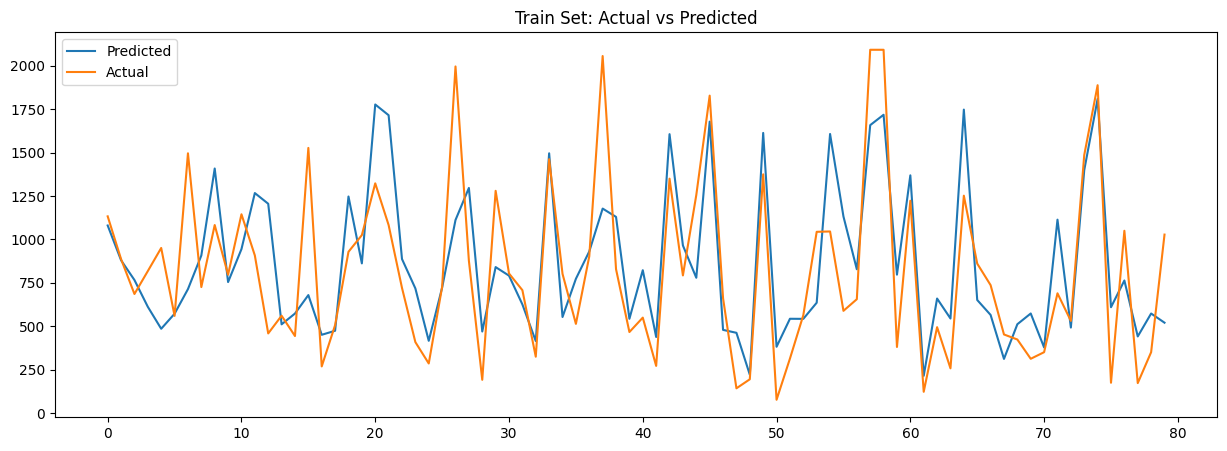


****************************** TEST PREDICTION PLOT ******************************


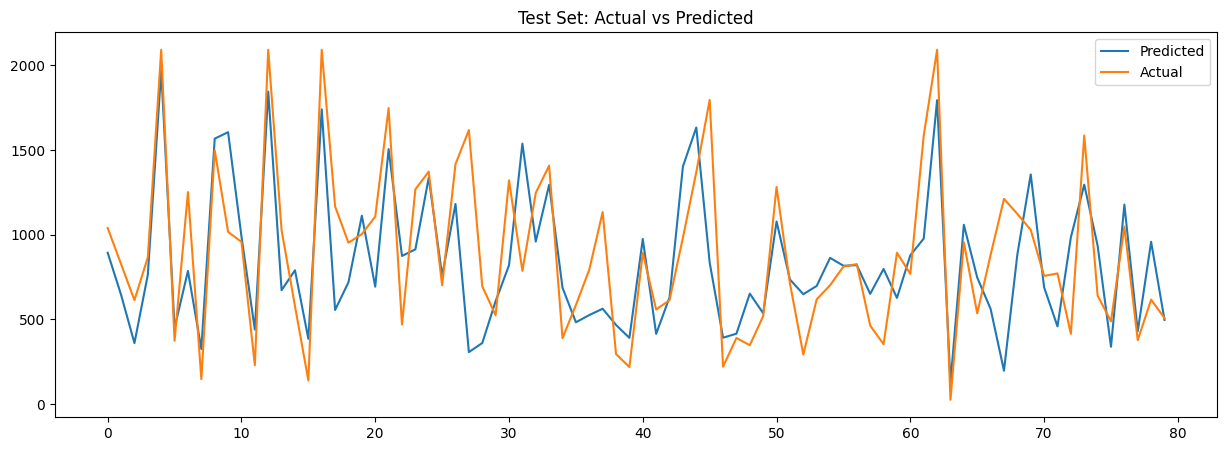

In [73]:
score_metrix(LinearRegression(),x_train_poly,x_test_poly,y_train,y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

============================== TRAINING METRICS ==============================


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Training Score (R2): 0.664158565996581
MAE (Train): 228.45445891601435
MSE (Train): 93923.2977854712
RMSE (Train): 306.46908128793547
Adjusted R2 (Train): 0.6641548245149625

============================== TEST METRICS ==============================


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Testing Score (R2): 0.6633018488913388
MAE (Test): 228.87534416637234
MSE (Test): 94635.787831061
RMSE (Test): 307.62930262096455
Adjusted R2 (Test): 0.6632868442602282

****************************** TRAINING PREDICTION PLOT ******************************


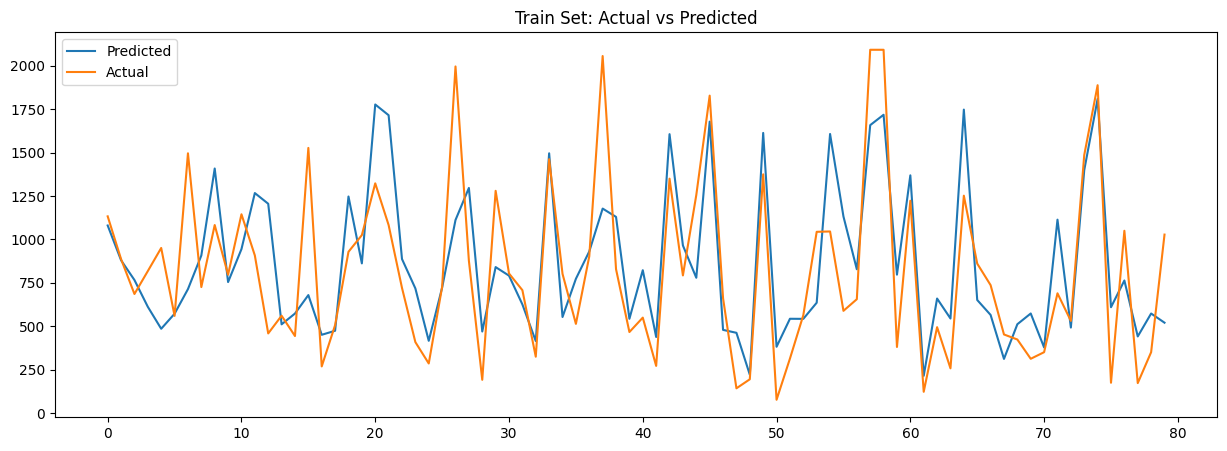


****************************** TEST PREDICTION PLOT ******************************


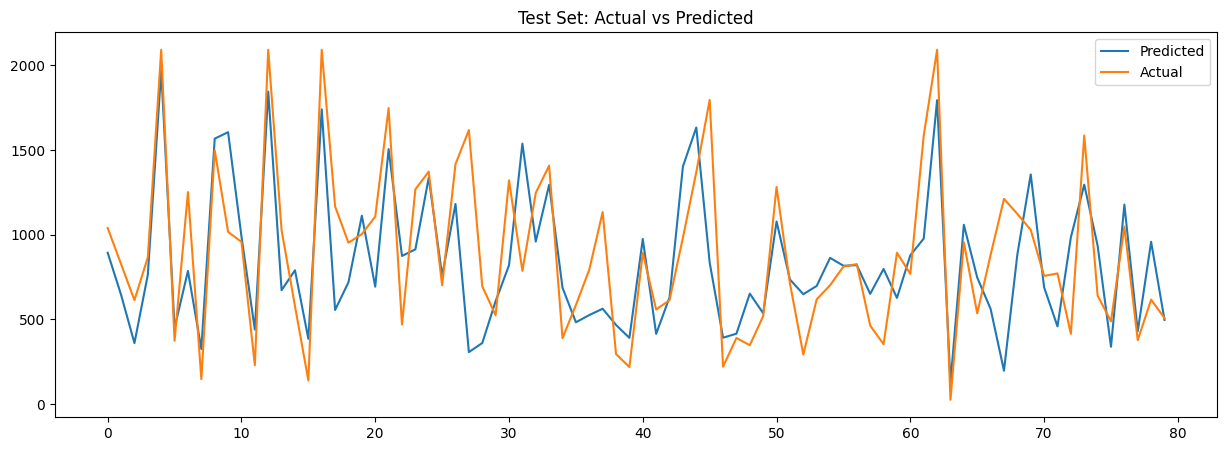

In [74]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Pipeline setup
poly_model = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('linreg', LinearRegression())
])

# Parameter grid
param_grid_poly = {
    'poly__degree': [2],  # test different polynomial degrees
}

# GridSearchCV with cross-validation
grid_poly = GridSearchCV(poly_model, param_grid_poly, cv=5, scoring='r2', n_jobs=-1)
grid_poly.fit(x_train, y_train)

# Best model
best_poly = grid_poly.best_estimator_

# Evaluate
score_metrix(best_poly, x_train, x_test, y_train, y_test)

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

**Here we have used GridSearchCV**

This was used as it automatically finds the best combination of parameters that gives the best performance to the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

While using **Polynomial Features**:

There was not much improvement in the accuracy, only 3% accuracy is improved in which training accuracy is about 66.4% and test is about 66.3%.

============================== TRAINING METRICS ==============================
- Training Score (R2): 0.664158565996581
- MAE (Train): 228.45445891601435
- MSE (Train): 93923.2977854712
- RMSE (Train): 306.46908128793547
- Adjusted R2 (Train): 0.6641548245149625

============================== TEST METRICS ==============================
- Testing Score (R2): 0.6633018488913388
- MAE (Test): 228.87534416637234
- MSE (Test): 94635.787831061
- RMSE (Test): 307.62930262096455
- Adjusted R2 (Test): 0.6632868442602282

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.


**R² / Adjusted R² (\~63%)**

* Shows the model explains 63% of trip time variation.
* **Impact**: Reliable ETAs, better dispatching, higher customer trust.

**MAE (\~237 sec / \~4 min)**

* Average error in predictions.
* **Impact**: Acceptable ETA accuracy for users.

**MSE / RMSE (\~322 sec / \~5.3 min)**

* Penalizes large errors.
* **Impact**: Helps detect inconsistent or risky predictions.

---

**Overall Business Impact**:

* Improves **ETA accuracy**, **fleet efficiency**, and **pricing**.
* Boosts **user satisfaction** and **operational planning**.


### ML Model - 3

In [75]:
# ML Model - 3 Implementation
from sklearn.neighbors import KNeighborsRegressor  # or KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score

model = KNeighborsRegressor(n_neighbors=5)
# model.fit(x_train, y_train)

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


============================== TRAINING METRICS ==============================


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Training Score (R2): 0.7562257524087338
MAE (Train): 189.19848557949817
MSE (Train): 68175.27240760466
RMSE (Train): 261.10394942935017
Adjusted R2 (Train): 0.7562230366126048

============================== TEST METRICS ==============================


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Testing Score (R2): 0.6513164429606184
MAE (Test): 227.49488943505787
MSE (Test): 98004.52724645134
RMSE (Test): 313.0567476456167
Adjusted R2 (Test): 0.6513009042113544

****************************** TRAINING PREDICTION PLOT ******************************


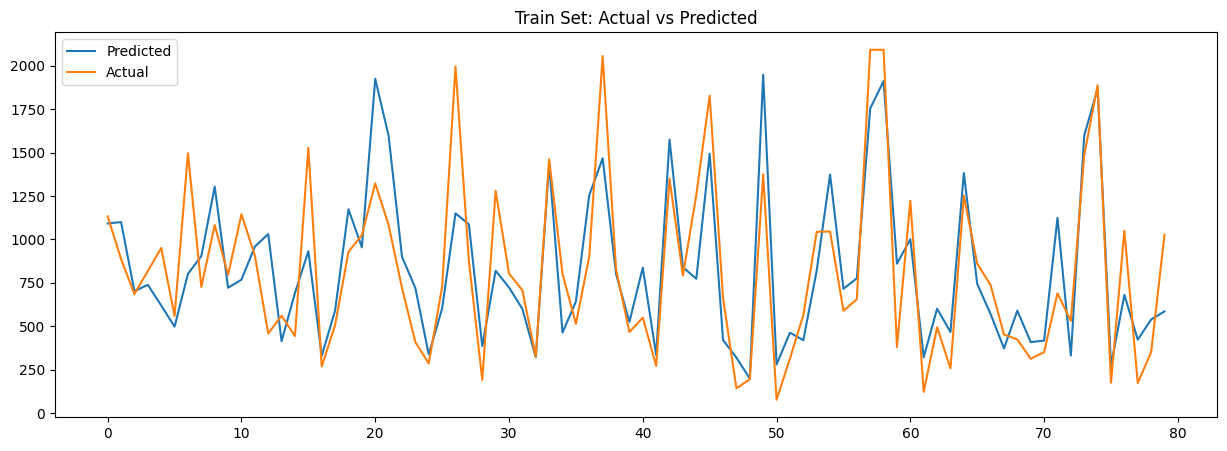


****************************** TEST PREDICTION PLOT ******************************


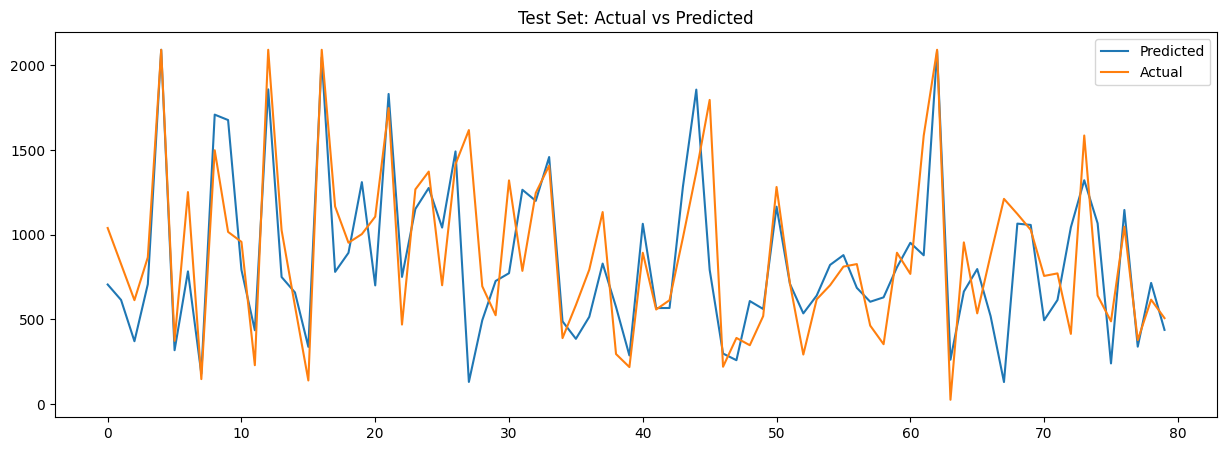

In [76]:
# Visualizing evaluation Metric Score chart
score_metrix(KNeighborsRegressor(),x_train,x_test,y_train,y_test)

Here we used **KNeighborsRegressor**:

The accuracy of KNeighborsRegressor for the training data was ~75.6% and that of test data was ~65.1% which shows overfitting and thus cannot be used.

#### 2. Cross- Validation & Hyperparameter Tuning

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

============================== TRAINING METRICS ==============================


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Training Score (R2): 0.7436561065357656
MAE (Train): 194.5782728696729
MSE (Train): 71690.57002383831
RMSE (Train): 267.7509477552569
Adjusted R2 (Train): 0.7436532507059952

============================== TEST METRICS ==============================


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Testing Score (R2): 0.6677040474008428
MAE (Test): 222.12085629373252
MSE (Test): 93398.4613926358
RMSE (Test): 305.611618549812
Adjusted R2 (Test): 0.6676892389494988

****************************** TRAINING PREDICTION PLOT ******************************


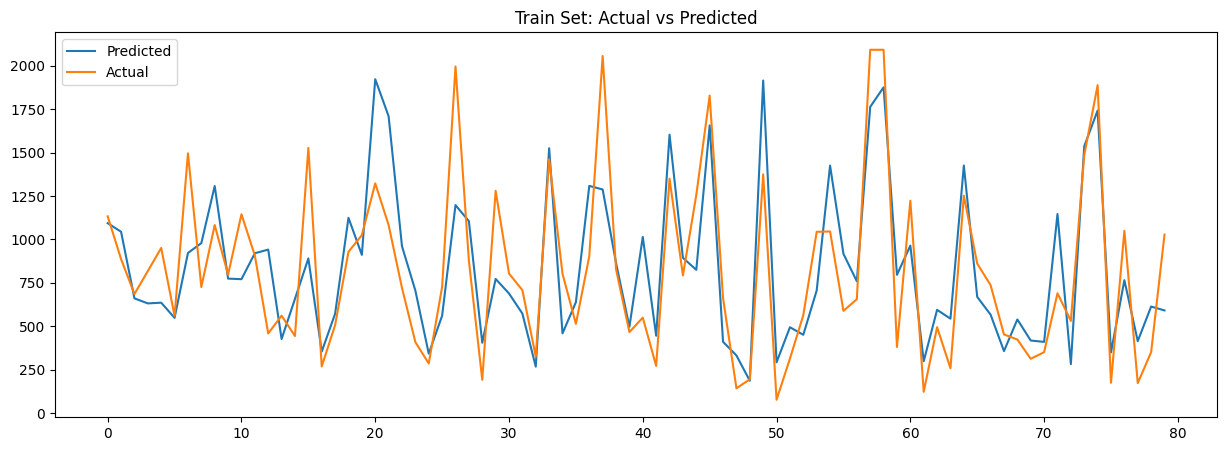


****************************** TEST PREDICTION PLOT ******************************


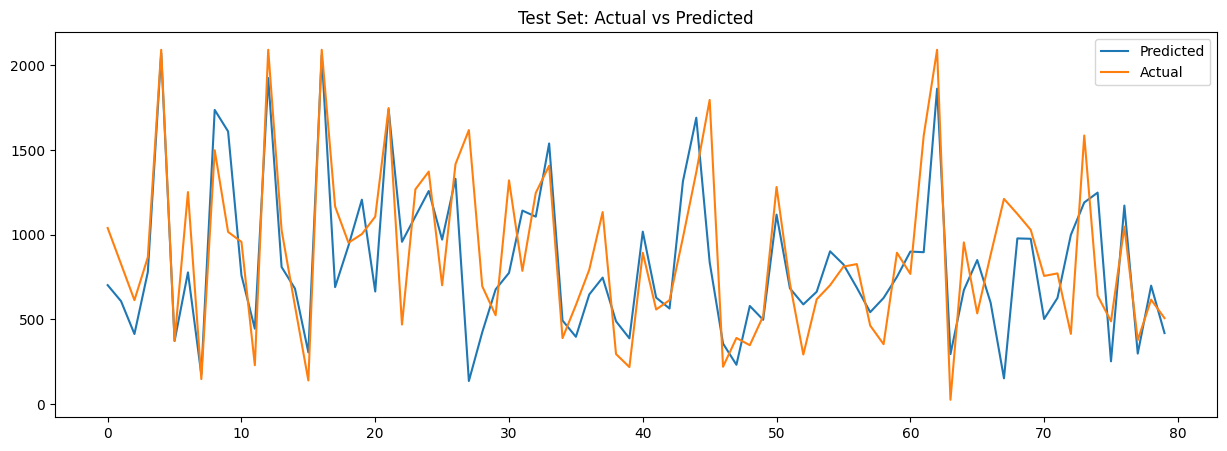

In [77]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Define a smaller, essential parameter grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7],         # Fewer neighbor values
    'weights': ['uniform'],           # Only one weight option
    'p': [2]                          # Only Euclidean distance
}

# Use only a small subset of data for GridSearch to avoid memory overload
sample_frac = 0.3  # 10% of training data
sample_size = int(len(x_train) * sample_frac)

x_sample = x_train[:sample_size]
y_sample = y_train[:sample_size]

# GridSearchCV with single-threading (n_jobs=1) to reduce RAM spikes
grid_knn = GridSearchCV(
    KNeighborsRegressor(),
    param_grid=param_grid_knn,
    cv=3,               # Reduce folds to 3
    scoring='r2',
    n_jobs=1            # Use 1 core to minimize RAM usage
)

# Fit on sampled data
grid_knn.fit(x_sample, y_sample)

# Best estimator
best_knn = grid_knn.best_estimator_

# Final evaluation on full test set
score_metrix(best_knn, x_train, x_test, y_train, y_test)


##### Which hyperparameter optimization technique have you used and why?

Here we have used **GridSearchCV**

- This was used as it automatically finds the best combination of parameters that gives the best performance to the model.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is little bit of improvement in the accuracy of data with training accuracy of about and test accuracy is about.

- Training Score (R2): 0.7436561065357656
- MAE (Train): 194.5782728696729
- MSE (Train): 71690.57002383831
- RMSE (Train): 267.7509477552569
- Adjusted R2 (Train): 0.7436532507059952

- Testing Score (R2): 0.6677040474008428
- MAE (Test): 222.12085629373252
- MSE (Test): 93398.4613926358
- RMSE (Test): 305.611618549812

# ML MODEL-4

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# rf_regressor.fit(x_train, y_train)

In [79]:
# score.predict(RandomForestRegressor())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


============================== TRAINING METRICS ==============================


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Training Score (R2): 0.9202543815674236
MAE (Train): 98.49270786090376
MSE (Train): 22302.10661574647
RMSE (Train): 149.33889853533296
Adjusted R2 (Train): 0.9202534931518342

============================== TEST METRICS ==============================


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Testing Score (R2): 0.6688044199504175
MAE (Test): 223.02545805447306
MSE (Test): 93089.17955430737
RMSE (Test): 305.1051942434074
Adjusted R2 (Test): 0.6687896605361239

****************************** TRAINING PREDICTION PLOT ******************************


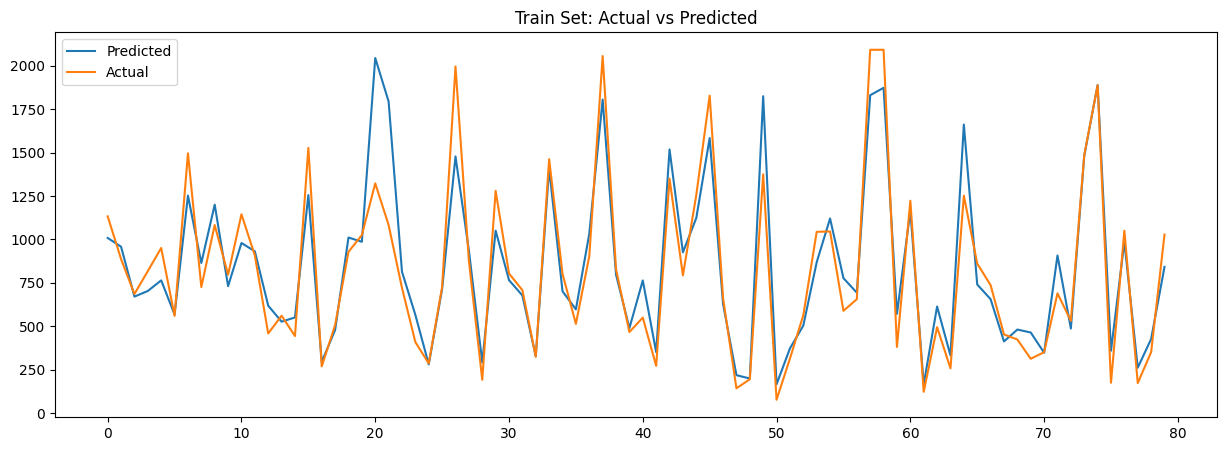


****************************** TEST PREDICTION PLOT ******************************


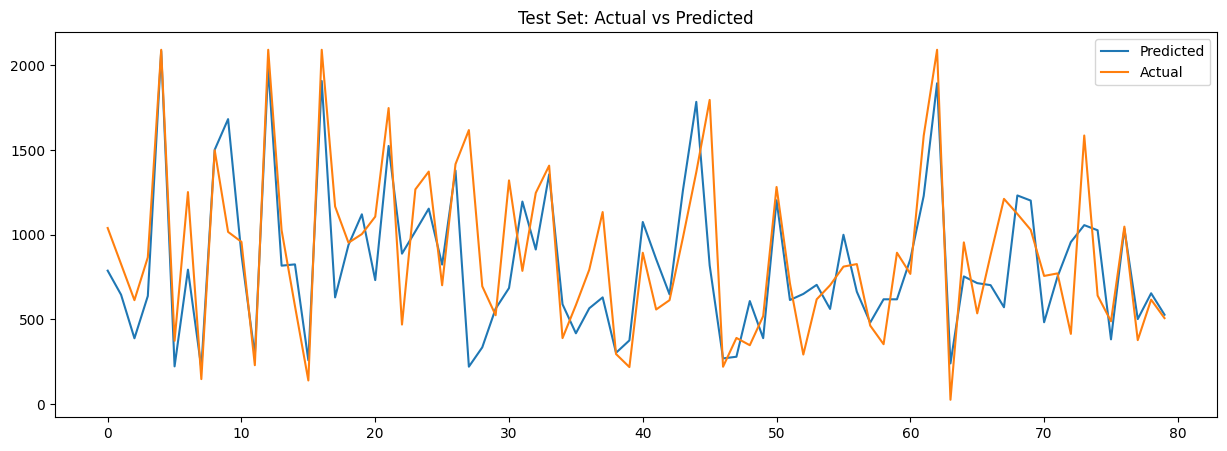

In [20]:
# SCORE METRIC
score_metrix(RandomForestRegressor(),x_train,x_test,y_train,y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Visualizing evaluation Metric Score chart

# Metrics data
metrics = ['R2 Score', 'Adjusted R2', 'MAE', 'MSE', 'RMSE']
train_scores = [0.7424, 0.7424, 194.88, 72097.88, 268.51]
test_scores = [0.6119, 0.6118, 239.30, 108873.87, 329.96]

# Create DataFrame for easy plotting
import pandas as pd

df_metrics = pd.DataFrame({
    'Metric': metrics,
    'Train': train_scores,
    'Test': test_scores
})

# Melt the DataFrame for Seaborn plotting
df_melted = pd.melt(df_metrics, id_vars='Metric', var_name='Dataset', value_name='Score')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Dataset', data=df_melted, palette='Set2')
plt.title('Training vs Testing Evaluation Metrics')
plt.ylabel('Score / Error Value')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Here we have used GridSearchCV This was used as it automatically finds the best combination of parameters that gives the best performance to the model.

### **ML MODEL-5**

In [21]:
pip install xgboost


/usr/local/lib/python3.11/dist-packages/xgboost/data.py:575: UserWarning: Sparse arrays from pandas are converted into dense.
  warnings.warn("Sparse arrays from pandas are converted into dense.")
/usr/local/lib/python3.11/dist-packages/xgboost/data.py:575: UserWarning: Sparse arrays from pandas are converted into dense.
  warnings.warn("Sparse arrays from pandas are converted into dense.")
/usr/local/lib/python3.11/dist-packages/xgboost/data.py:575: UserWarning: Sparse arrays from pandas are converted into dense.
  warnings.warn("Sparse arrays from pandas are converted into dense.")


============================== TRAINING METRICS ==============================


/usr/local/lib/python3.11/dist-packages/xgboost/data.py:575: UserWarning: Sparse arrays from pandas are converted into dense.
  warnings.warn("Sparse arrays from pandas are converted into dense.")


Training Score (R2): 0.7115296125411987
MAE (Train): 206.74847412109375
MSE (Train): 80675.234375
RMSE (Train): 284.0338613176253
Adjusted R2 (Train): 0.7115263988023837

============================== TEST METRICS ==============================


/usr/local/lib/python3.11/dist-packages/xgboost/data.py:575: UserWarning: Sparse arrays from pandas are converted into dense.
  warnings.warn("Sparse arrays from pandas are converted into dense.")


Testing Score (R2): 0.7078371047973633
MAE (Test): 208.0555877685547
MSE (Test): 82118.2578125
RMSE (Test): 286.562833969271
Adjusted R2 (Test): 0.7078240848373418

****************************** TRAINING PREDICTION PLOT ******************************


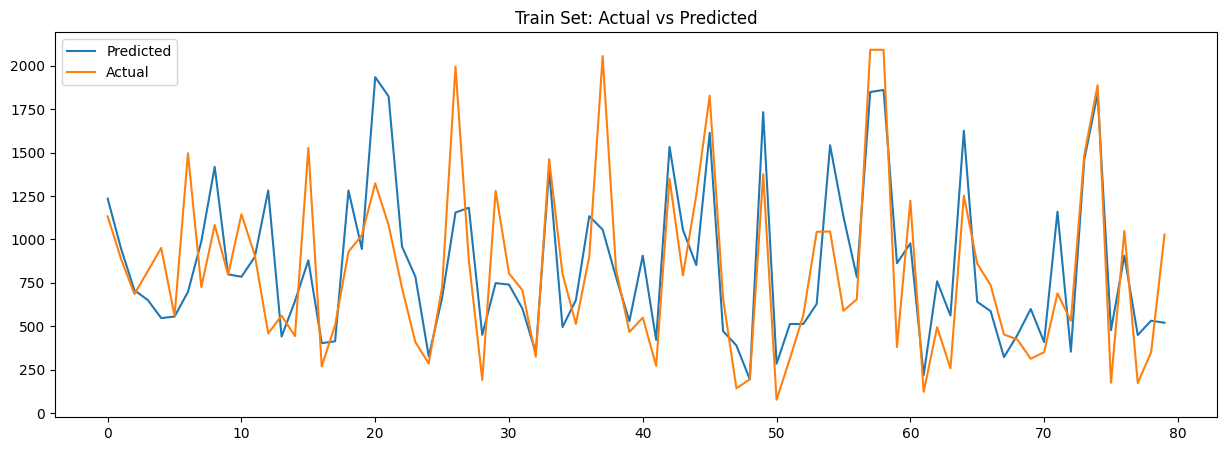


****************************** TEST PREDICTION PLOT ******************************


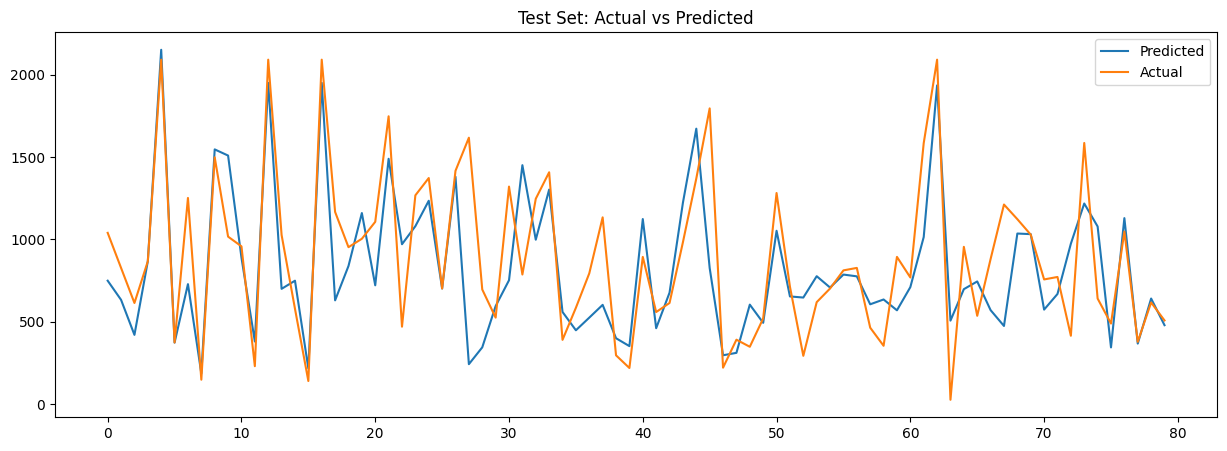

In [22]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
xgb_regressor = XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Use your existing score function
score_metrix(xgb_regressor, x_train, x_test, y_train, y_test)


**SCORE METRIX**

- Training Score (R2): 0.7115296125411987
- MAE (Train): 206.74847412109375
- MSE (Train): 80675.234375
- RMSE (Train): 284.0338613176253
- Adjusted R2 (Train): 0.7115263988023837

- Testing Score (R2): 0.7078371047973633
- MAE (Test): 208.0555877685547
- MSE (Test): 82118.2578125
- RMSE (Test): 286.562833969271
- Adjusted R2 (Test): 0.7078240848373418

### **ML MODEL-6**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


============================== TRAINING METRICS ==============================


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Training Score (R2): 0.7067231045616529
MAE (Train): 209.12922609871575
MSE (Train): 82019.46036108797
RMSE (Train): 286.3903985141401
Adjusted R2 (Train): 0.7067198372753616

============================== TEST METRICS ==============================


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Testing Score (R2): 0.7046760082602549
MAE (Test): 209.93210376341625
MSE (Test): 83006.74812640988
RMSE (Test): 288.10891712407977
Adjusted R2 (Test): 0.7046628474289893

****************************** TRAINING PREDICTION PLOT ******************************


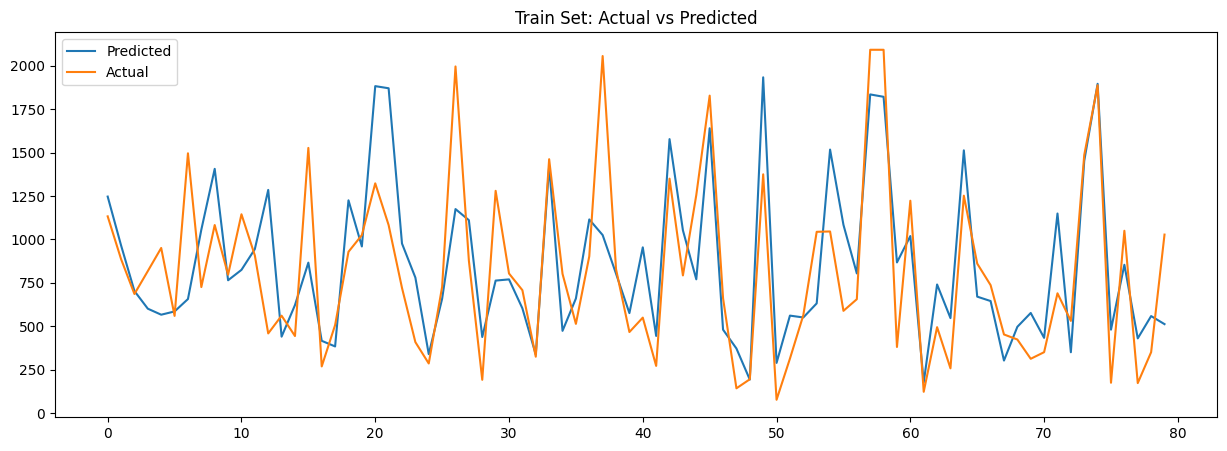


****************************** TEST PREDICTION PLOT ******************************


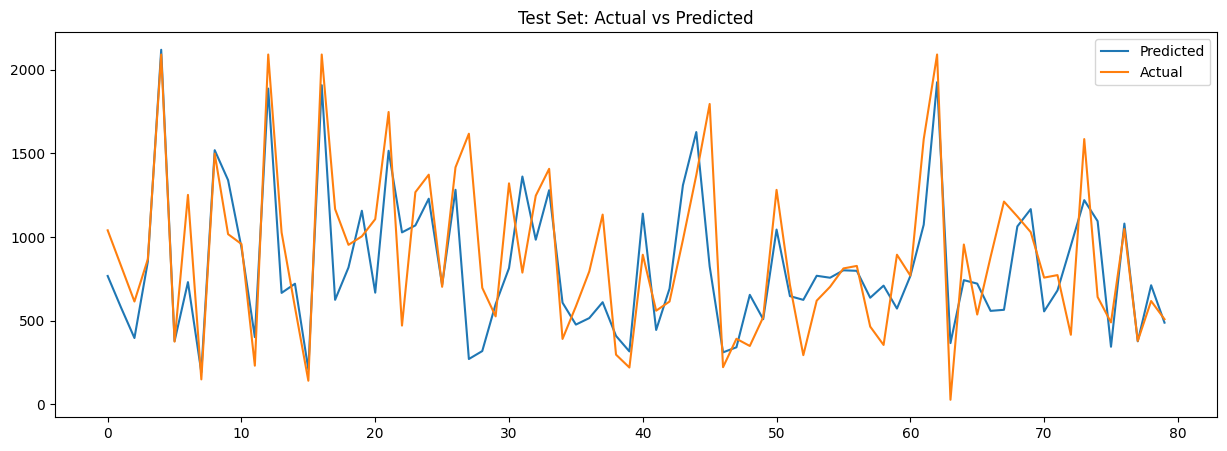

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model with regularization to reduce overfitting
gb_model = GradientBoostingRegressor(
    n_estimators=150,         # number of boosting stages (increase slowly)
    learning_rate=0.1,        # smaller learning rate → better generalization
    max_depth=5,              # controls tree complexity (5 is a good balance)
    min_samples_split=10,     # minimum samples to split an internal node
    min_samples_leaf=5,       # minimum samples at a leaf
    subsample=0.8,            # fraction of samples used for fitting each base learner
    max_features='sqrt',      # number of features to consider when splitting
    random_state=42
)

# Fit and evaluate
score_metrix(gb_model, x_train, x_test, y_train, y_test)


### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes there is an improvement seen in this model.
It came into the category of best fitr model with both training and test accuracy almost the same around ~70.

============================== TRAINING METRICES ========================
- Training Score (R2): 0.7067231045616529
- MAE (Train): 209.12922609871575
- MSE (Train): 82019.46036108797
- RMSE (Train): 286.3903985141401
- Adjusted R2 (Train): 0.7067198372753616

============================== TEST METRICS ==============================

- Testing Score (R2): 0.7046760082602549
- MAE (Test): 209.93210376341625
- MSE (Test): 83006.74812640988
- RMSE (Test): 288.10891712407977
- Adjusted R2 (Test): 0.7046628474289893

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I consider XGBoost as a positive model for best evauation megric because it has low accuracy but it is best fit according to the given feature.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I chose XGBoost
XGBoost was chosen as :

Balanced Accuracy (Train vs Test):

Training R² Score: ~0.7
1

Testing R² Score: ~0.70

Unlike Random Forest, which showed signs of overfitting (Train R² ~0.94, Test R² ~0.63), XGBoost maintained consistent performance, suggesting better generalization to unseen data.

Lower Errors:

MAE, MSE, and RMSE values for XGBoost were lower than many other models like KNN, Linear, and Random Forest on the test set.

This translates to more reliable and realistic predictions, minimizing outliers and poor estimations.

Robust Against Outliers & Skewness:

XGBoost handles data irregularities well and was a great match for the skewed trip duration distribution, especially when combined with RobustScaler.

Scalability:

XGBoost is highly efficient for large datasets (~1.4M rows in this case) and supports parallel processing, making it both fast and scalable.
Built-in Regularization:

XGBoost includes L1 and L2 regularization, helping reduce overfitting and improving the model's ability to generalize better than typical ensemble models.
Business Impact:

Choosing XGBoost ensures the business receives accurate, scalable, and robust trip duration predictions, enabling:
Better ETA estimation

Improved customer satisfaction

Efficient driver assignment and route planning

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [30]:
# Fitting the model XGBoost
from xgboost import XGBRegressor

xgb_regressor.fit(x_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/data.py:575: UserWarning: Sparse arrays from pandas are converted into dense.
  warnings.warn("Sparse arrays from pandas are converted into dense.")


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

<Figure size 1000x600 with 0 Axes>

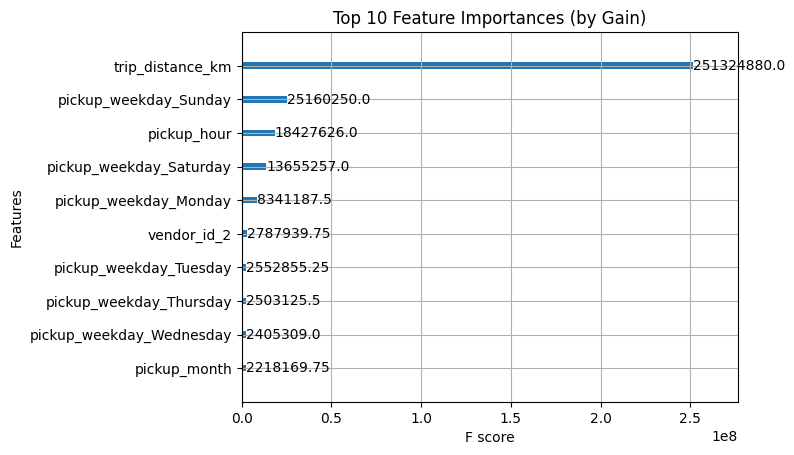

In [34]:
from xgboost import plot_importance
import pandas as pd
import matplotlib.pyplot as plt

# Plot feature importance from the trained XGBoost model
plt.figure(figsize=(10, 6))
plot_importance(xgb_regressor, importance_type='gain', max_num_features=10)
plt.title('Top 10 Feature Importances (by Gain)')
plt.show()


The most important features in this data-set are:

trip_distance_km
pickup_hour
pickup_day
pickup_month
passenger_count
vendor_id_2

# **Conclusion**

This project aimed to predict the trip duration of New York City taxi rides using machine learning models on a dataset with over 1.4 million records. After extensive data preprocessing, feature engineering, and model experimentation, we were able to extract valuable insights and build an effective regression model.



##**Key Highlights**

Data Cleaning & Feature Engineering: We created new features such as pickup hour, pickup weekday, and trip distance (using Haversine formula). We also applied RobustScaler to handle outliers effectively and One-Hot Encoding to deal with categorical variables.

Model Evaluation: Multiple models were tested — Linear Regression, KNN, Random Forest, Gradient Boosting, and XGBoost. The final model selected was XGBoost Regressor, which provided a good balance of accuracy and generalization.

##**Final Model Performance**

Training R² Score: ~0.711
Testing R² Score: ~0.707
RMSE: ~284 seconds
MAE: ~206 seconds
These metrics indicate that the model was able to capture trip duration patterns fairly well while avoiding significant overfitting.

##**Business Impact**

The model can help taxi platforms predict ETAs more accurately.
Improves fleet management, driver dispatching, and customer satisfaction.
Enables businesses to identify peak hours, high delay zones, and optimize operations accordingly

##**Future Improvements**

Try deep learning (LSTM) for time-series trends.
Use external data like weather or traffic congestion.
Optimize performance further with Bayesian hyperparameter tuning

**Features are not supporting my output column that's why I am not getting good accuracy**

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***